In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Content Description

- id - Unique id identifying the comic.
- Name - full name of the comic.
- Writer- Author of the comic.
- Likes- Total no. of Likes
- genre - genres for comic.
- rating - an average rating out of 10 for the comic.
- Subscribers- Total no. of subscribers
- Summary- Summary of the comic
- Update - Day of the week for an update
- Reading Link- Link where you can read the comic

In [4]:
webtoon = pd.read_csv("../data/Webtoon Dataset.csv")

In [161]:
webtoon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            569 non-null    int64  
 1   Name          569 non-null    object 
 2   Writer        568 non-null    object 
 3   Likes         569 non-null    object 
 4   Genre         569 non-null    object 
 5   Rating        569 non-null    float64
 6   Subscribers   569 non-null    object 
 7   Summary       569 non-null    object 
 8   Update        569 non-null    object 
 9   Reading Link  569 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 44.6+ KB


In [162]:
webtoon.isna().sum()

id              0
Name            0
Writer          1
Likes           0
Genre           0
Rating          0
Subscribers     0
Summary         0
Update          0
Reading Link    0
dtype: int64

In [163]:
print("Display Row of data with nulls")
webtoon[webtoon["Writer"].isnull()]

Display Row of data with nulls


,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
245,245,My Roommate is a Gumiho,NaN,1M,Romance,9.62,257.3K,"Under normal circumstances, 24-year-old Dam Le...","UP EVERY TUE, SAT",https://www.webtoons.com/en/romance/my-roommat...


In [164]:
# My Roommate is a Gumiho (간 떨어지는 동거),  it can be found that the name of Writer is "Na" from the naver website.
# We can fill the null data.
webtoon.loc[245, "Writer"] = "Na"
webtoon.loc[245]

id                                                            245
Name                                      My Roommate is a Gumiho
Writer                                                         Na
Likes                                                          1M
Genre                                                     Romance
Rating                                                       9.62
Subscribers                                                257.3K
Summary         Under normal circumstances, 24-year-old Dam Le...
Update                                          UP EVERY TUE, SAT
Reading Link    https://www.webtoons.com/en/romance/my-roommat...
Name: 245, dtype: object

In [165]:
webtoon.isna().sum() # Not nulls in data

id              0
Name            0
Writer          0
Likes           0
Genre           0
Rating          0
Subscribers     0
Summary         0
Update          0
Reading Link    0
dtype: int64

In [166]:
print("Shape of the dataset : ", webtoon.shape)
webtoon.head()

Shape of the dataset :  (569, 10)


,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...


In [188]:
import re
import string

def clean_text(text):
    # Remove non-printable characters
    text = ''.join(filter(lambda x: x in string.printable, text))

    # Replace multiple whitespace characters with a single space
    text = re.sub(r'\s{2,}', ' ', text).strip()

    return text.strip()


def get_webtoon_description(row):
    # Create a formatted description using the relevant features from the input data
    description = (
        f"{row['Name']} has a subscribers {row['Subscribers']}. \n" 
        f"Summary: {row['Summary']}.\n"
        f"It was produced by {row['Writer']}.\n"
        f"Its genres are {row['Genre']}.\n"
    )

    return clean_text(description)

In [189]:
print(get_webtoon_description(webtoon.iloc[0]))

Let's Play has a subscribers 4.2M. Summary: She's young, single and about to achieve her dream of creating incredible videogames. But then life throws her a one-two punch: a popular streamer gives her first game a scathing review. Even worse she finds out that same troublesome critic is now her new neighbor! A funny, sexy and all-too-real story about gaming, memes and social anxiety. Come for the plot, stay for the doggo..
It was produced by Leeanne M. Krecic (Mongie).
Its genres are Romance.


In [190]:
webtoon['generated_description'] = webtoon.apply(get_webtoon_description, axis=1)
webtoon.head()

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link,generated_description
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...,Let's Play has a subscribers 4.2M. Summary: Sh...
1,1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...,True Beauty has a subscribers 6.4M. Summary: A...
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...,Midnight Poppy Land has a subscribers 2.1M. Su...
3,3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...,Age Matters has a subscribers 3.5M. Summary: S...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...,Unholy Blood has a subscribers 1.5M. Summary: ...


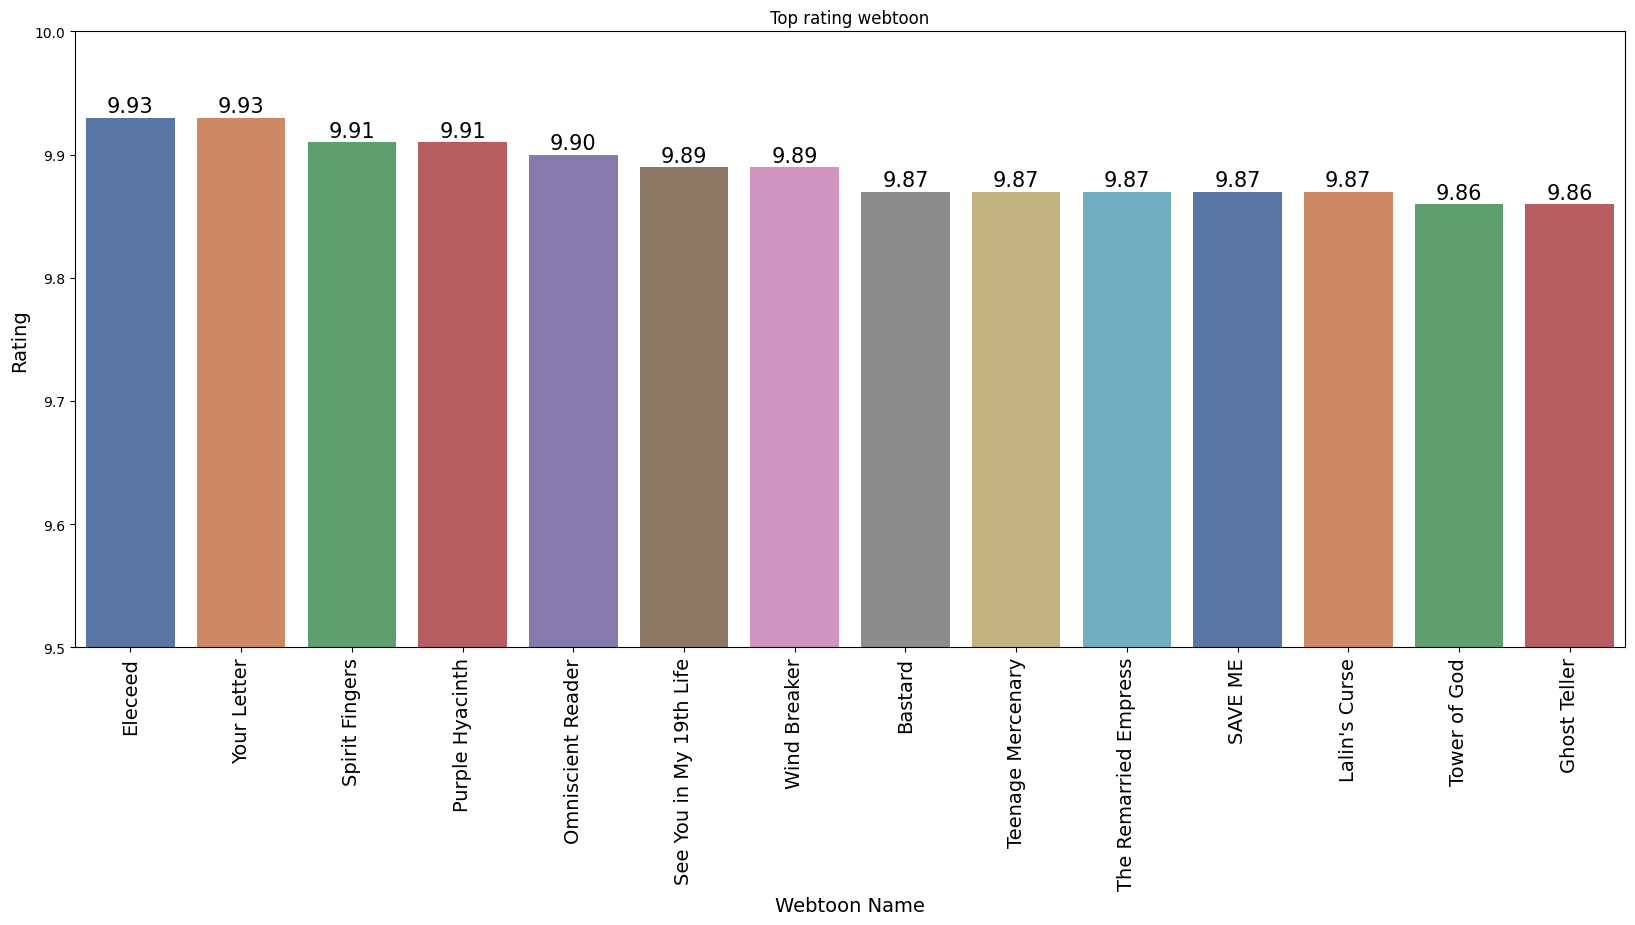

In [41]:
# Top rating
top_ratings = webtoon.sort_values(by=["Rating"], ascending=False)[:14].copy()
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_ratings["Name"], y=top_ratings["Rating"], palette="deep")
p.axes.set_title("Top rating webtoon")

for bar in p.patches:
    p.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.ylabel("Rating", size=14)
plt.xlabel("Webtoon Name", size=14)
plt.xticks(rotation = 90, size=14)
plt.ylim(9.5, 10.0)
plt.show()

Highly negative distribution
Most of Webtoon ratings are spread between 9.0 - 10.0


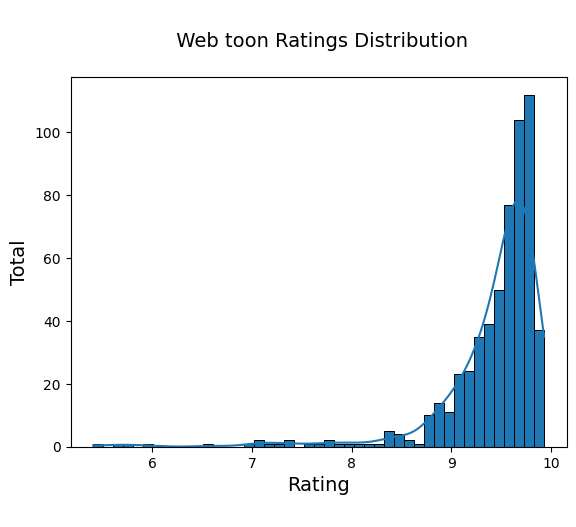

In [80]:
p = sns.histplot(webtoon["Rating"], kde=True, alpha=1)
plt.title("\n Web toon Ratings Distribution\n",fontsize = 14)
plt.xlabel("Rating\n", fontsize = 14)
plt.ylabel("Total", fontsize = 14)
print("Highly negative distribution")
print("Most of Webtoon ratings are spread between 9.0 - 10.0")

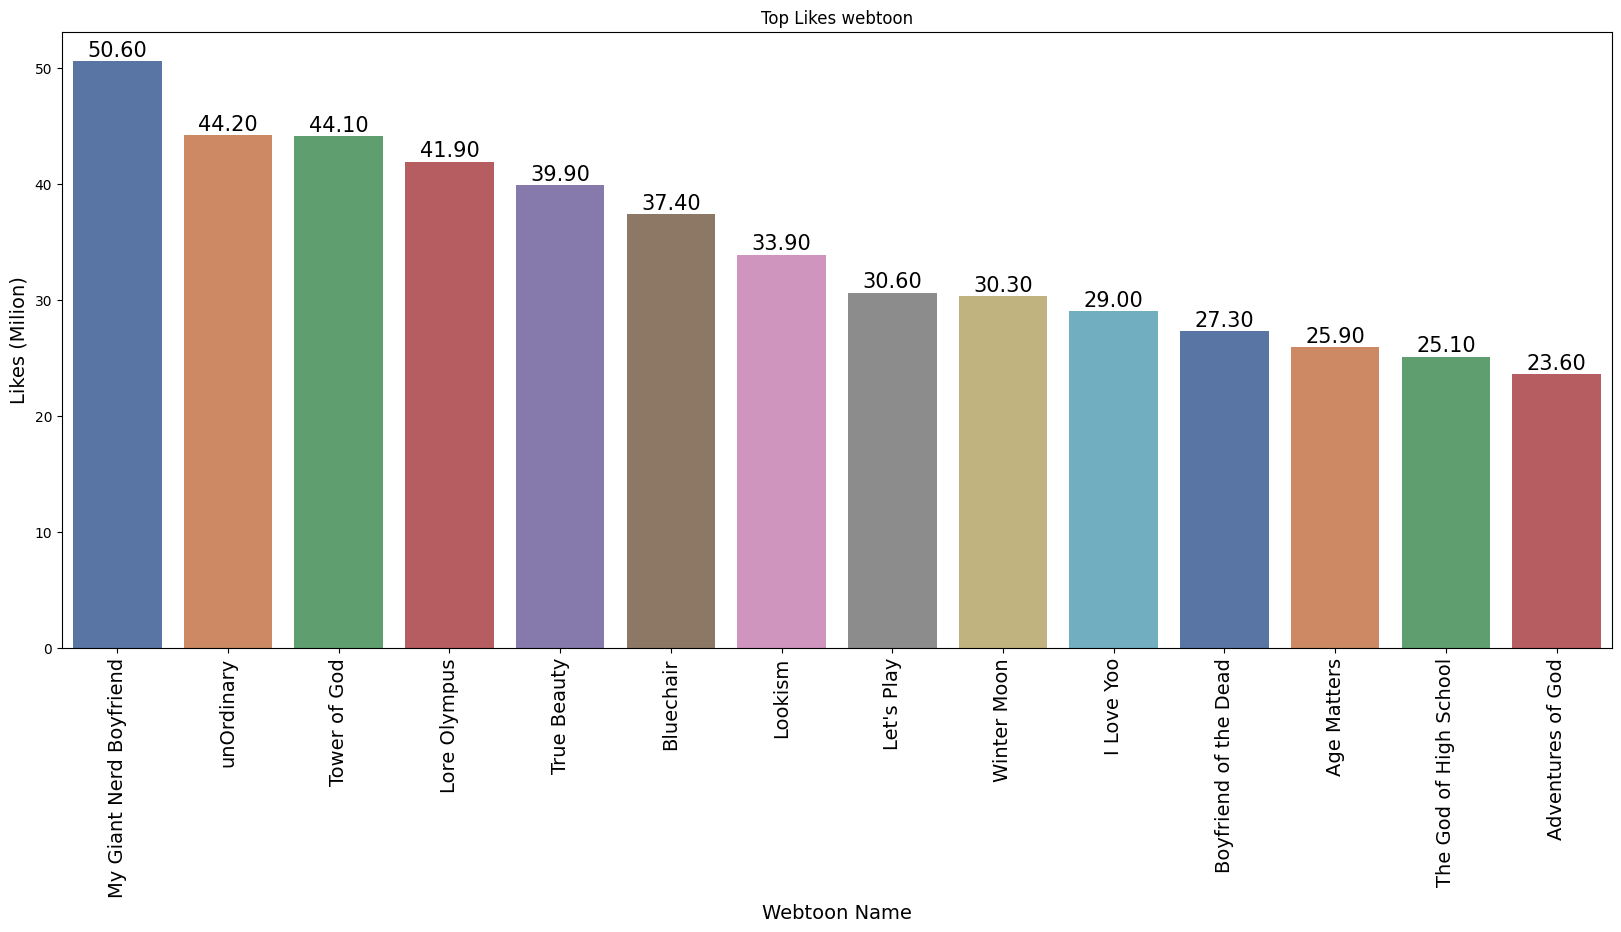

In [61]:
def convert_to_number(value):
    if 'K' in value:
        value = value.replace('K', '')
        return pd.to_numeric(value) * 1000
    if 'M' in value:
        value = value.replace('M', '')
        return pd.to_numeric(value) * 1000000
    value = value.replace(',', '')
    return pd.to_numeric(value, errors='coerce')

top_Likes = webtoon.copy()
top_Likes['Likes'] = top_Likes['Likes'].apply(convert_to_number)
# Top likes
top_Likes = top_Likes.sort_values(by=["Likes"], ascending=False)[:14]
top_Likes

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_Likes["Name"], y=top_Likes["Likes"] / 1000000, palette="deep")
p.axes.set_title("Top Likes webtoon")

for bar in p.patches:
    p.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.ylabel("Likes (Milion)", size=14)
plt.xlabel("Webtoon Name", size=14)
plt.xticks(rotation = 90, size=14)
# plt.ylim(9.5, 10.0)
plt.show()

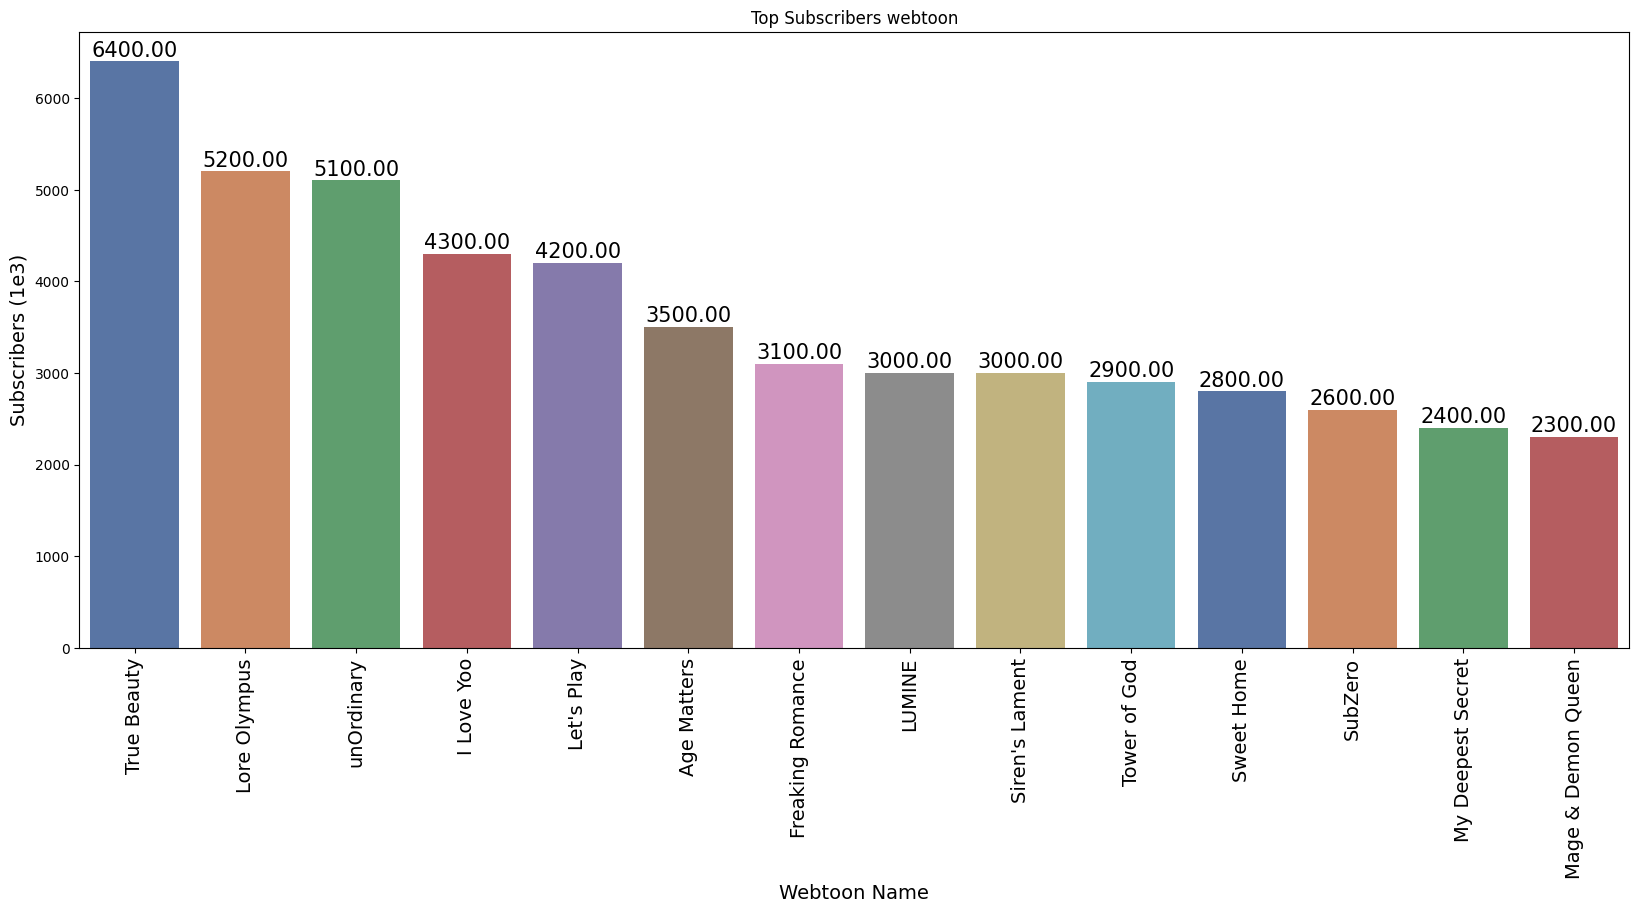

In [63]:
top_subscribers = webtoon.copy()
# 'values' 칼럼에 함수 적용
top_subscribers['Subscribers'] = top_subscribers['Subscribers'].apply(convert_to_number)
# Top Subscribers

top_subscribers = top_subscribers.sort_values(by=["Subscribers"], ascending=False)[:14]
top_subscribers

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_subscribers["Name"], y=top_subscribers["Subscribers"] / 1000, palette="deep")
p.axes.set_title("Top Subscribers webtoon")

for bar in p.patches:
    p.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.ylabel("Subscribers (1e3)", size=14)
plt.xlabel("Webtoon Name", size=14)
plt.xticks(rotation = 90, size=14)
# plt.ylim(9.5, 10.0)
plt.show()

In [87]:
print("Total number of genre: ", len(webtoon["Genre"].unique()))

Total number of genre:  16


In [86]:
webtoon["Genre"].value_counts().to_frame().T

Genre,Fantasy,Romance,Drama,Comedy,Slice of life,Action,Thriller,Supernatural,Sci-fi,Superhero,Horror,Sports,Mystery,Informative,Historical,Heartwarming
count,95,90,60,52,49,47,35,33,32,26,20,10,9,5,4,2


let's explore how genre's wordcloud looks like



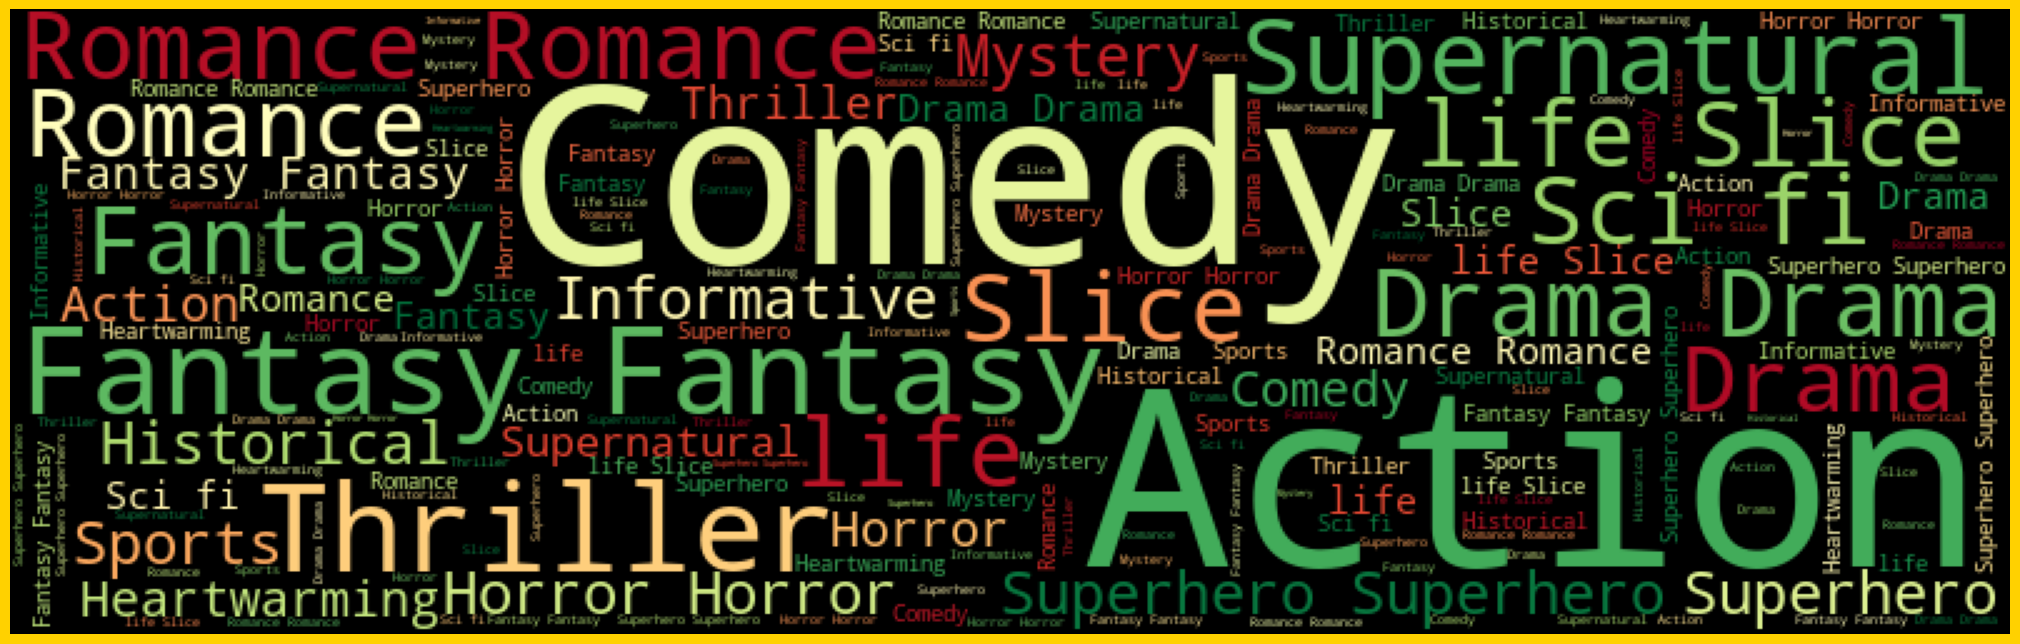

In [97]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 250, background_color ="black",colormap ="RdYlGn",
                      max_font_size=100, stopwords =None,repeat= True).generate(webtoon["Genre"].str.cat(sep=","))

print("let's explore how genre's wordcloud looks like\n")
plt.figure(figsize = (20, 8),facecolor = "#ffd100") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0) 
plt.show()

In [6]:
anime_embeddings = np.load("../data/anime_embeddings.npy")

In [17]:
anime = pd.read_csv("../data/anime_merged.csv")

In [192]:
from sentence_transformers import SentenceTransformer
docs = webtoon['generated_description'].tolist()
e = SentenceTransformer("anime_encoder")
webtoon_embeddings = e.encode(docs, batch_size=32, show_progress_bar=True)

Batches: 100%|██████████| 18/18 [00:17<00:00,  1.05it/s]


In [193]:
webtoon_embeddings.shape

(569, 768)

In [239]:
np.save("./webtoon_embeddings.npy", webtoon_embeddings, allow_pickle=False)

In [8]:
webtoon_embeddings = np.load("../data/webtoon_embeddings.npy")

In [7]:
rating_complete = pd.read_csv('../data/rating_complete.csv').dropna()
print(rating_complete.shape)
rating_complete.head(2)

(57633278, 3)


,user_id,anime_id,rating
0,0,430,9
1,0,1004,5


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
def get_preferred_anime_from_user(user_id, rating_complete):
    return rating_complete[(rating_complete['user_id'] == user_id) & (rating_complete['rating'] >= 9)]['anime_id'].tolist()

In [11]:
user_ids = rating_complete['user_id'].unique()
user_ids

array([     0,      1,      2, ..., 353402, 353403, 353404], dtype=int64)

In [51]:
len(user_ids)

310059

In [15]:
preferred_animes = get_preferred_anime_from_user(user_id=user_ids[0], rating_complete=rating_complete)

In [16]:
def get_simliar_animes(anime, anime_id, embeddings, k):
    try:
        idx = anime[anime["MAL_ID"] == anime_id] .index[0]
    except:
        return []
    
    cosine_sim_matrix = cosine_similarity(embeddings)
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    
    # Sort the animes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices and scores of the k most similar animes
    k_indices_scores = sim_scores[1:k+1]

    # Separate indices and scores
    k_indices = [i[0] for i in k_indices_scores]
    k_scores = [round(i[1], 3) for i in k_indices_scores]

    # Get the MAL_IDs of the k most similar animes
    k_anime_ids = anime['MAL_ID'].iloc[k_indices].tolist()

    return list(zip(k_anime_ids, k_scores))

In [18]:
get_simliar_animes(anime, 430, anime_embeddings, k=3)

[(12115, 0.996), (2418, 0.996), (9135, 0.996)]

In [22]:
def get_relevant_webtoons(webtoon:pd.DataFrame, anime:pd.DataFrame, preferred_anime_id:list, anime_embeddings:np.array, webtoon_embeddings:np.array, k:int=3) -> list:
    recommendations = {}
    simliar_animess = get_simliar_animes(anime, preferred_anime_id, anime_embeddings, k=k)
    anime_toon_matrix = cosine_similarity(anime_embeddings, webtoon_embeddings)
    for anime_id, cosine_score in simliar_animess:
        try:
            sim_scores = list(enumerate(anime_toon_matrix[anime_id]))
        except:
            continue
        
        # Sort the animes based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        k_indices_scores = sim_scores[1:k+1]
        
        # Separate indices and scores
        k_indices = [i[0] for i in k_indices_scores]
        k_scores = [round(i[1], 3) for i in k_indices_scores]
        
        # Get the webtoon id's of the k most similar animes
        k_webtoon_ids = webtoon['id'].iloc[k_indices].tolist()
        recommendations[anime_id] = list(zip(k_webtoon_ids, k_scores))
    return recommendations

In [23]:
recommendations = []
for preferred_anime_id in preferred_animes:
    recommendations.append(get_relevant_webtoons(webtoon, anime, preferred_anime_id, anime_embeddings, webtoon_embeddings))


In [34]:
anime_key

[12115, 2418, 9135, 2044, 4113, 1806, 4485, 14373]

In [46]:
anime_key = []
webtoon_key = []
webtoon_score = []
for rec in recommendations[:2]:
    for key, vals in rec.items():
        anime_key.append(key)
        for val in vals:
            webtoon_key.append(val[0])
            webtoon_score.append(val[1])
        

In [49]:
webtoon_score

[0.971,
 0.97,
 0.969,
 0.981,
 0.981,
 0.979,
 0.695,
 0.694,
 0.69,
 0.979,
 0.979,
 0.978,
 0.98,
 0.978,
 0.977,
 0.727,
 0.726,
 0.725]

In [238]:
top_items_per_key = {}
for d in recommendations:
    for key, values in d.items():
        top_items = sorted(values, key=lambda x: x[1], reverse=True)[:3]
        top_items_per_key[key] = top_items

all_top_items = []
for key, items in top_items_per_key.items():
    all_top_items.append((key, items[0][1]))  # (key, highest_similarity)

top_keys = [key for key, _ in sorted(all_top_items, key=lambda x: x[1], reverse=True)[:3]]

for key in top_keys:
    print(f"Key: {key}")
    for item, similarity in top_items_per_key[key]:
        print(f"  Item: {item}, Similarity: {similarity}")

Key: 4485
  Item: 430, Similarity: 0.9860000014305115
  Item: 246, Similarity: 0.984000027179718
  Item: 211, Similarity: 0.9810000061988831
Key: 87
  Item: 430, Similarity: 0.9860000014305115
  Item: 246, Similarity: 0.9829999804496765
  Item: 211, Similarity: 0.9800000190734863
Key: 603
  Item: 359, Similarity: 0.9850000143051147
  Item: 246, Similarity: 0.984000027179718
  Item: 254, Similarity: 0.9819999933242798
